In [50]:
# --- Import Dependencies ---
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [29]:
# --- Load Dataset ---
try :
    df = pd.read_csv("Mall_Customers.csv")
    print("-- successfully loaded dataset --")
except FileNotFoundError :
    print("-- failed to load dataset, enter the correct filepath --")

-- successfully loaded dataset --


In [30]:
# --- Preview Dataset ---
print(df.info())
print(df['Gender'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
['Male' 'Female']


In [31]:
# --- Cleaning • Encoding • Scaling ---
df['Gender_Encoded'] = df['Gender'].map({ 'Female' : 0, 'Male' : 1 })
df.drop(['Gender', 'CustomerID'], axis = 1, inplace = True)
scalar = StandardScaler()
df_scaled = scalar.fit_transform(df)
print("-- df is successfully scaled for modelling --")

-- df is successfully scaled for modelling --


In [32]:
# --- Elbow Method ---
inertias = []
for k in range(1, 11) :
    kmeans = KMeans(n_clusters = k, random_state = 42, n_init = 'auto')
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)

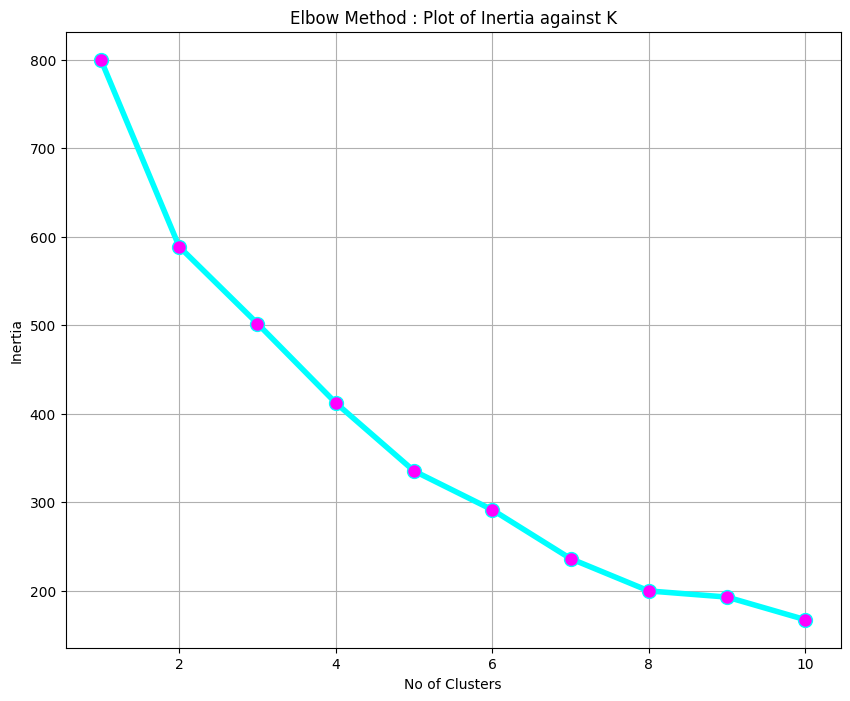

In [65]:
# --- Visualize Elbow Method ---
plt.figure(figsize = (10, 8))
plt.plot(range(1, 11), inertias, marker = 'o', ms = 10, ls = '-', lw = 4, c = 'cyan', mfc = 'magenta')
plt.title("Elbow Method : Plot of Inertia against K")
plt.xlabel("No of Clusters")
plt.ylabel("Inertia")
plt.grid()
plt.show()

In [57]:
# --- Final K-Means Model and Label Assignment ---

# VISUAL INFERENCE: The "elbow" usually occurs around K = 2 for this dataset.
optimal_k = 2
kmeans_final = KMeans(n_clusters = optimal_k, random_state = 42, n_init = 'auto')
clusters = kmeans_final.fit_predict(df_scaled)

df['Clusters'] = clusters

In [58]:
# --- Cluster Evaluation (Silhouette Score) ---
silhouette_avg = silhouette_score(df.drop('Clusters', axis = 1), clusters)
print(f"silhouette_avg : {silhouette_avg}")

silhouette_avg : 0.27616270812085714


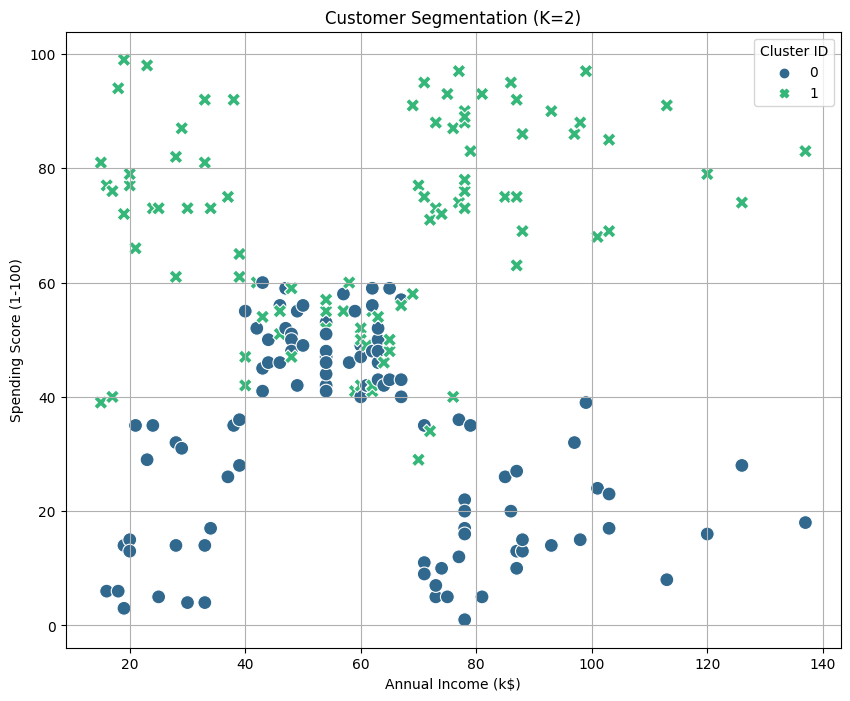

In [60]:
# --- Visualization (Reducing to 2D for Plotting) ---

# For clear visualization, we'll use only the two most important features (Income vs. Spending)
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Annual Income (k$)', 
    y='Spending Score (1-100)', 
    hue='Clusters', 
    data=df,
    palette='viridis', 
    style='Clusters',
    s=100
)
plt.title(f'Customer Segmentation (K={optimal_k})')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()